<a href="https://colab.research.google.com/github/martuscellifaria/MachineLearning/blob/main/19_Ads_clicks_optimization_using_upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ads clicks optimization using upper confidence bound**
We'll be using upper confidence bound (UCB) reinforcement learning method to optimize the clicks that a sales company gather.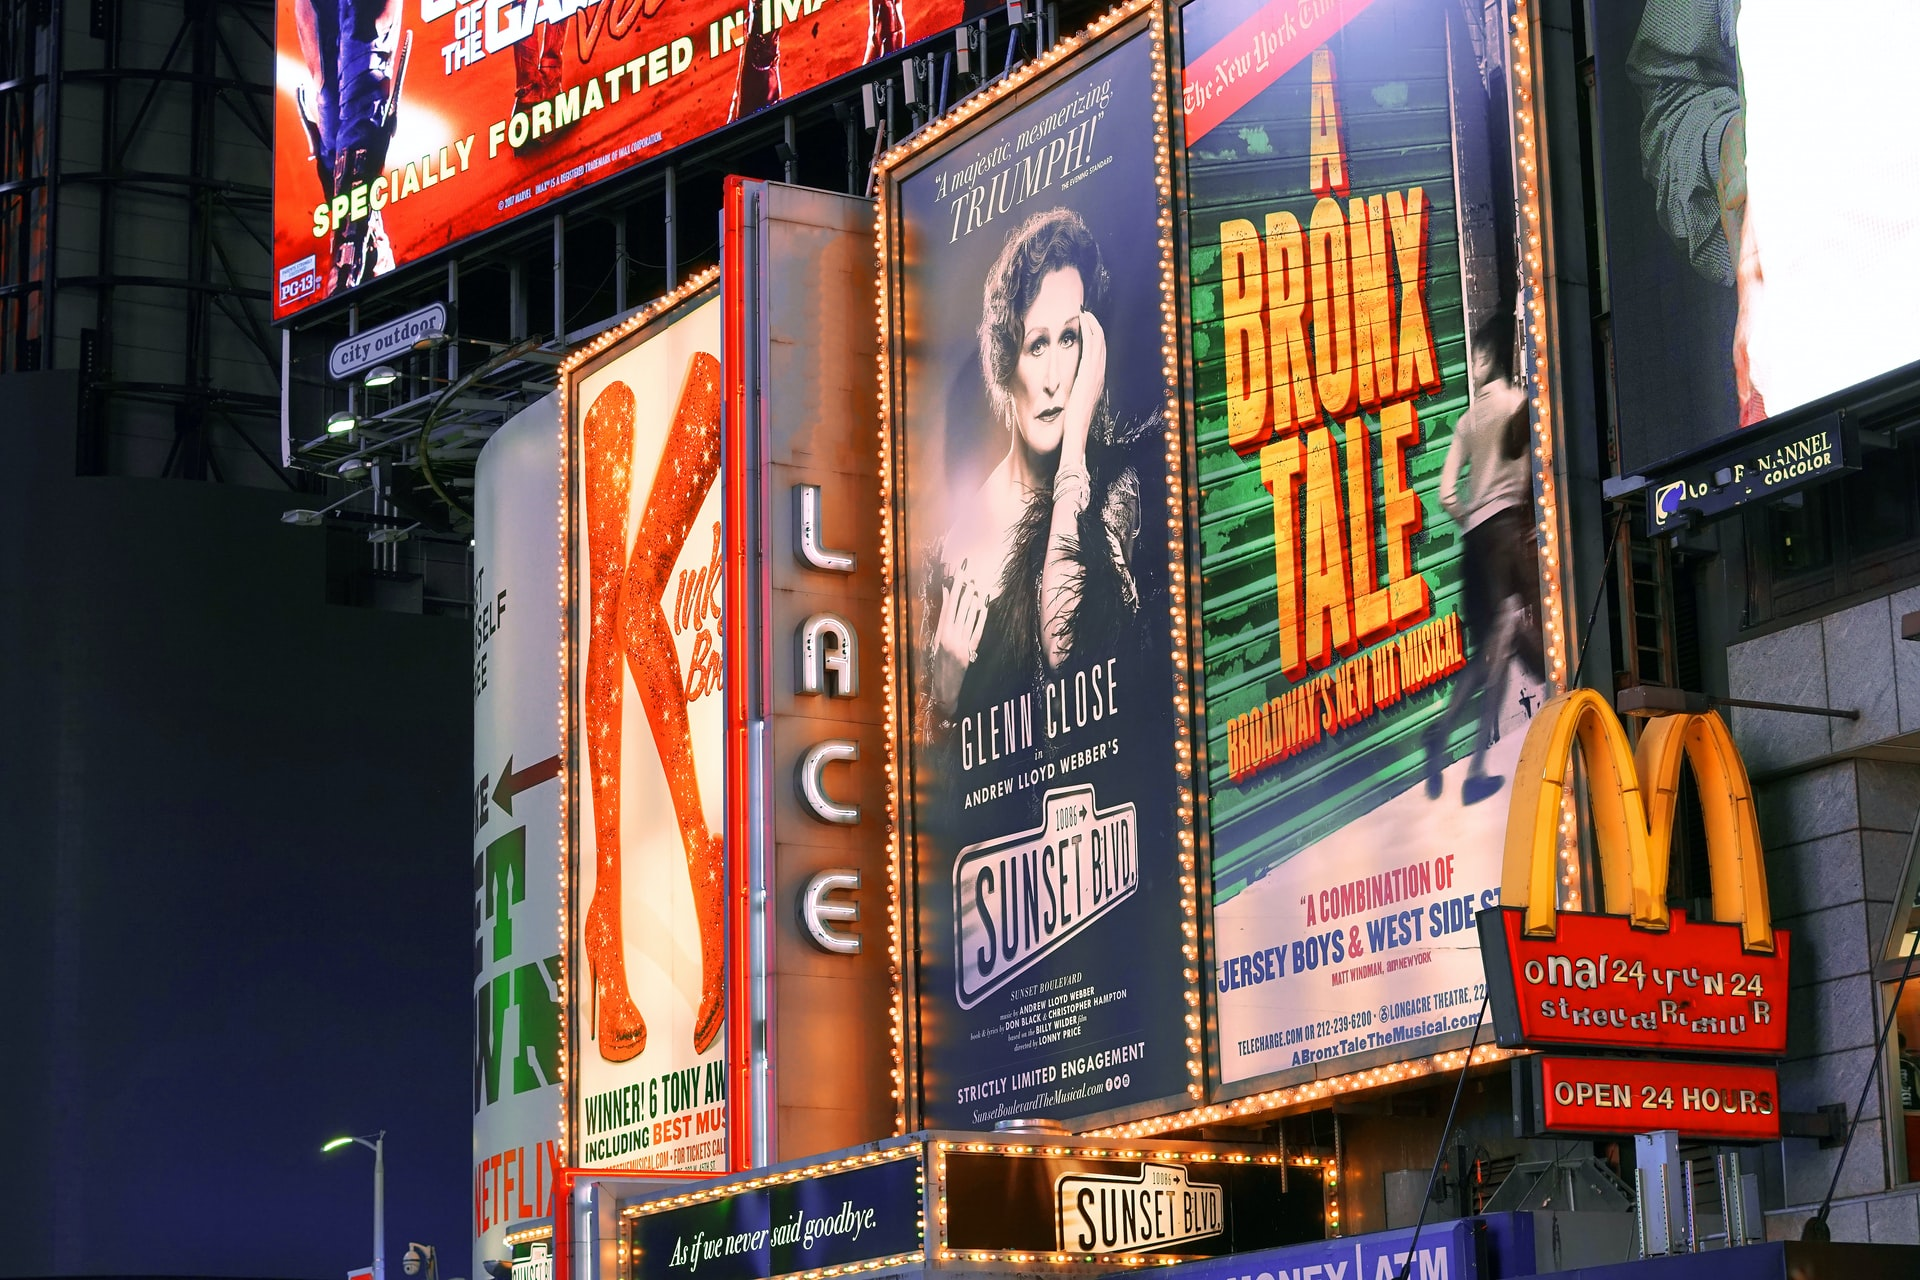

#**01. Importing libraries**
Once again, the main libraries follow:

*   Numpy - Perform mathematical operations;
*   Pandas - Perform data manipulation and analysis;
*   Matplotlib - Library for plotting and visualizing data.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **02. Loading data from a .csv file**
Let us load the Ads_CTR_Optimisation.csv file.

In [2]:
dataset= pd.read_csv('/content/drive/My Drive/Colab Notebooks/Study Datasets/Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


# **03. Applying UCB model to the dataset**
We'll be using the library ***math*** to perform UCB.

In [3]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

#**04. Visualizing the results**
From this plot, we shall see the distribution of clicks for every of the ten ads.

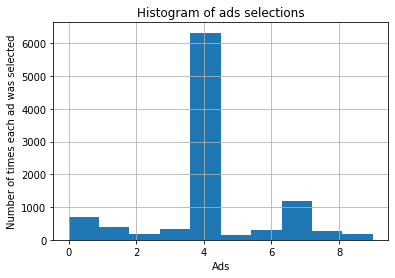

In [4]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.grid(which='major')
plt.grid(which='minor')
plt.show()

#**05. Conclusion**
The fifth ad is the best to be selected, with near 6500 clicks.